In [1]:
#Importing essentials
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns
import math as math

from scipy import integrate

from scipy.integrate import quad

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

from scipy.stats.kde import gaussian_kde
from scipy.stats import norm

from scipy.stats import norm


from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
from mpl_toolkits import mplot3d
from sklearn import preprocessing

#Graph Settings
fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
#print ("Current size:", fig_size)
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] =15
plt.rcParams["figure.figsize"] = fig_size

name=["SKMS", "SKP","SLY4","SV-MIN","UNEDF0","UNEDF1",]

df = pd.read_csv('dme_LO.csv')
from platform import python_version

print(python_version())


3.7.3


In [2]:
#importing from experimental file
# Num Nuc  A   N   Z        E        E/A     dE     Eval    S1n     dS1n  Eval    
# 0   1    2   3   4        5        6       7      8       9       10    11

#S1p     dS1p  Eval    S2n     dS2n  Eval    S2p     dS2p  Eval
#12      13    14      15      16    17      18      19    20


exp_energies = np.loadtxt('EXPERIMENT_AME2016.dat',usecols=(3,4,5))
e_df=pd.DataFrame(exp_energies)
e_df.columns=['N','Z','exp_BE']


In [3]:
match_e_df   =pd.DataFrame(columns=e_df.columns)
match_df     =pd.DataFrame(columns=df.columns)


Empty_columns=['dipole_n',
               'dipole_p',
               'octpole_n',
               'octpole_p',
               'q5_n',
               'q5_p',
               'q7_n',
               'q7_p',
               'NABLArho^2',
               'NABLArhoJ',
               'HartreeE',
               'ExtraE',
               'ExternalFE',
               'Entropy_n',
               'Entropy_n',
               'Entropy_p']

for i in range(0,len(e_df)):
    for j in range(0,len(df)):
        if e_df.N.iloc[i]==df.N.iloc[j] and e_df.Z.iloc[i]==df.Z.iloc[j]:
            #all_data = all_data.append(df)[df.columns.tolist()]

            match_df    =  match_df.append(df.iloc[j], ignore_index=True)
            match_e_df  =  match_e_df.append(e_df.iloc[i], ignore_index=True)

In [4]:
#print(match_df['Energy'].describe())
#print(match_e_df['exp_BE'].describe())

a=match_df.Energy
b=match_e_df.exp_BE
c=a-b

data=[match_df.Z, match_df.N, c,a,b]

headers = ["Z", "N", "Diff", "The_BE", "Exp_BE"]

match_diff_df = pd.concat(data, axis=1, keys=headers)

match_diff_df.describe()

match_df['Diff']=c
 
match_df.describe()
    

,Z,N,Energy,NShells,b0,bz,bp,lambda_n,lambda_p,Lambda_n,...,CoulombE,CoulombDir,CoulombEx,TensorE,HartreeE,ExtraE,ExternalFE,Entropy_n,Entropy_p,Diff
count,840.000000,840.000000,840.000000,840.0,840.000000,840.00000,840.000000,840.000000,840.000000,840.000000,...,840.000000,840.000000,840.000000,840.000000,840.0,840.0,840.0,840.0,840.0,840.000000
mean,58.266667,82.895238,-1119.776189,20.0,2.046657,2.12884,2.009242,-7.542471,-7.251526,-7.542471,...,503.963076,526.349030,-22.385952,-7.659142,0.0,0.0,0.0,0.0,0.0,0.000948
std,27.476727,42.808312,513.666496,0.0,0.216527,0.26981,0.211353,3.332471,5.282697,3.332471,...,351.559007,362.023756,10.642448,3.322694,0.0,0.0,0.0,0.0,0.0,2.445782
min,2.000000,2.000000,-2080.744100,20.0,1.156730,1.19380,1.138640,-21.176000,-27.610260,-21.176000,...,0.759800,1.326000,-45.374400,-20.357200,0.0,0.0,0.0,0.0,0.0,-13.560979
25%,36.000000,48.000000,-1529.895975,20.0,1.928880,1.97799,1.890130,-9.504017,-10.223638,-9.504017,...,204.055300,218.114425,-30.970700,-10.204150,0.0,0.0,0.0,0.0,0.0,-1.151338
50%,58.000000,82.000000,-1159.270350,20.0,2.092080,2.16539,2.032335,-7.121860,-6.107900,-7.121860,...,444.044350,466.269700,-22.485600,-7.879400,0.0,0.0,0.0,0.0,0.0,0.023194
75%,80.000000,114.000000,-729.952825,20.0,2.208970,2.33634,2.198660,-5.266198,-3.159080,-5.266198,...,768.808825,799.819950,-14.059125,-5.701550,0.0,0.0,0.0,0.0,0.0,1.345143
max,118.000000,176.000000,-18.907600,20.0,2.367450,2.47988,2.405080,0.258690,1.283770,0.258690,...,1462.059100,1507.433600,-0.566200,0.001800,0.0,0.0,0.0,0.0,0.0,13.881583


In [5]:
no_match_df  =pd.DataFrame(columns=df.columns)

for i in range(0,len(df)):
    k=0
    for j in range(0,len(match_df)):
        if df.N.iloc[i]==match_df.N.iloc[j] and df.Z.iloc[i]==match_df.Z.iloc[j]:
            k=1
    if k==0:
        no_match_df=no_match_df.append(df.iloc[i], ignore_index=True)       

In [6]:
def overlap(f1, f2):
    # First we need to calaculate the normalization constants
    n1 = integrate.quad(lambda x: f1(x)**2,  -np.inf,  np.inf)[0]
    n2 = integrate.quad(lambda x: f2(x)**2,  -np.inf,  np.inf)[0]
    # Normalizing these functions (the quantum mechanis way) means doing the replacement f(x) -> f(x)/sqrt(N)
    # So we calculate the integral of the product and divide by sqrt(N1*N2)
    return integrate.quad(lambda x: f1(x)*f2(x),  -np.inf,  np.inf)[0]/np.sqrt(n1*n2)

In [7]:
feal_enovl=[]    
    
for i in df.columns:
    
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!Removing Empty Columns
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

    if i=='dipole_n':
        print("DIPOLE_N Empty \n")
        continue
        
    if i=='dipole_p':
        print("DIPOLE_p Empty \n")
        continue
   
    if i=='octpole_n':
        print('OCTPOLE_N Empty \n')
        continue
        
    if i=='octpole_p':
        print('OCTPOLE_P Empty \n')
        continue
    
    if i=='q5_n':
        print('q5_n Empty \n')
        continue
    
    if i=='q5_p':
        print('q5_p Empty \n')
        continue
        
    if i=='q7_n':
        print('q7_n Empty \n')
        continue
    
    if i=='q7_p':
        print('q7_p Empty \n')
        continue
    
    if i=='NABLArho^2':
        print('NABLArho^2 Empty \n')
        continue
    
    if i=='NABLArhoJ':
        print('NABLArhoJ Empty \n')
        continue
        
    if i=='HartreeE':
        print('HartreeE Empty \n')
        continue
        
    if i=='ExtraE':
        print(' ExtraE Empty \n')
        continue
    
    if i=='ExternalFE':
        print('ExternalFE Empty \n')
        continue
        
    if i==' Entropy_n':
        print(' Entropy_n Empty \n')
        continue
        
    if i=='Entropy_n':
        print('Entropy_n Empty \n')
        continue
    
    if i=='Entropy_p':
        print('Entropy_p Empty \n')
        continue
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    
    out_1=match_df[i]
    out_2=no_match_df[i]
        
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    m_r_test=0
    l_ovl=0
    r_ovl=0
    
    if min(out_1)<=min(out_2):
        f_l=min(out_1)
        m_r_test=m_r_test+1
        l_ovl=l_ovl+1
        
    else:
        f_l=min(out_2)


    if max(out_1)>=max(out_2):
        f_r=max(out_1)
        m_r_test=m_r_test+1
        r_ovl=r_ovl+1
        
    else:
        f_r=max(out_2)
       
    """
    if m_r_test==2:
        print("Inside Match Range!")
    
    elif l_ovl==1 and r_ovl==0:
        print("The max of the out data set is higher than the max of the in data set")
    elif l_ovl==0 and r_ovl==1:
        print("The min of the out data set is lower than the min of the in data set")
    elif m_r_test==0:
        print("No Overlap!")
    """
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    
    add_w=0.25*(abs(f_l)+abs(f_r))

    f_l=f_l-add_w
    f_r=f_r+add_w


    x_1   = np.linspace(f_l,    f_r,  1500)
    x_2   = np.linspace(f_l,    f_r,  1500)
    x_1_2 = np.linspace(f_l,    f_r,  1500)


    


    KDE_1 = gaussian_kde(out_1, 'silverman')
    KDE_2 = gaussian_kde(out_2, 'silverman')
    
    def min_of_each(x):
        if(KDE_1(x)<=KDE_2(x)):
            return KDE_1(x)
        else:
            return KDE_2(x)
    
    
    a=[]
    for j in x_1_2:
        a.append(min_of_each(j))

    
    
    ovl_coeff=overlap(KDE_1,KDE_2)
    orig_ovl=quad(min_of_each, f_l,f_r)
    
    in_mean = np.mean(out_1)
    out_mean = np.mean(out_2)
    
    in_std  =np.std(out_1)
    
    
    
    #print(out_mean)
    #print(in_mean+(in_std))
    #print(in_mean-(in_std))
    
    

    if 0.7<=ovl_coeff:
        print(i)
        print(ovl_coeff)
        
        feal_enovl.append(i)
        
        #plt.plot(x_1,KDE_1(x_1),label="In Data Set",color="blue")
        #plt.plot(x_2,KDE_2(x_2),label="Out Data Set",color="red")
        #plt.plot(x_1_2,a,label="Min of Data Set",color="green")
        #plt.legend()
        #plt.show()

       
    
    


Z
0.7166912724602786


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


bz
0.845091967848125
delta_n
0.8906566464704986


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:150: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


delta_p
0.7765450221219145
pairingE_p
0.9689416849746215
LNlambda_n
0.7551114899674202
LNlambda_p
0.7646456245123662
LNEnergy_n
0.901784490479337
LNdelta_n
0.7502842149424093


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:150: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


beta2_n
0.9334517430142499


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:150: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


beta2_p
0.9323135672511188


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:150: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


beta2_t
0.9326697205438585
DIPOLE_N Empty 

DIPOLE_p Empty 

quadpole_n
0.8748015121680589
quadpole_p
0.968059509093614
OCTPOLE_N Empty 

OCTPOLE_P Empty 



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:150: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


hexdpole_n
0.898442646815022


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:150: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


hexdpole_p
0.8853372364144134
q5_n Empty 

q5_p Empty 

q6_n
0.8447091234593749
q6_p
0.8666574241301618
q7_n Empty 

q7_p Empty 

q8_n
0.8366133335284023
q8_p
0.8608433822540948
KineticE_p
0.8298649059816747
VolumeE
100.17246744675677
rho_rho
110.02003386242681
NABLArho^2 Empty 

NABLArhoJ Empty 

CoulombE
0.7390602740958322
CoulombDir
0.7397625080036975
CoulombEx
0.7692665260423862
HartreeE Empty 

 ExtraE Empty 

ExternalFE Empty 

Entropy_n Empty 

Entropy_p Empty 



In [8]:
all_features=[]
all_features_match=[]


for i in feal_enovl:
    a=match_df[i]
    all_features_match.append(a)
    
for i in feal_enovl:
    a=df[i]
    all_features.append(a)
    

    
tr_te_ta = match_df.Diff
all_features_match=np.transpose(all_features_match)
all_features=np.transpose(all_features)

rf=RandomForestRegressor(n_estimators=3000)#, bootstrap=False,)

            

X_train, X_test, y_train, y_test = train_test_split(all_features_match,tr_te_ta, test_size =0.25, random_state=42 )

rf.fit(X_train,y_train)
all_fea_pred        =rf.predict(all_features)
all_fea_pred_match  =rf.predict(all_features_match)
all_fea_pred_test   =rf.predict(X_test)
all_fea_pred_train  =rf.predict(X_train)


isotope_match=[]
isotope_N_match=[]


print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))
print(rf.feature_importances_)

0.9735315729393672
0.8481761918972647
[0.04054834 0.01656738 0.06485242 0.04064306 0.1068686  0.04955216
 0.02120296 0.02463407 0.02001361 0.01450528 0.0218619  0.01362103
 0.02161212 0.04940273 0.01542098 0.01863803 0.01835479 0.01573452
 0.01798023 0.01513954 0.11005271 0.0320522  0.03020633 0.06349767
 0.06694623 0.09009112]


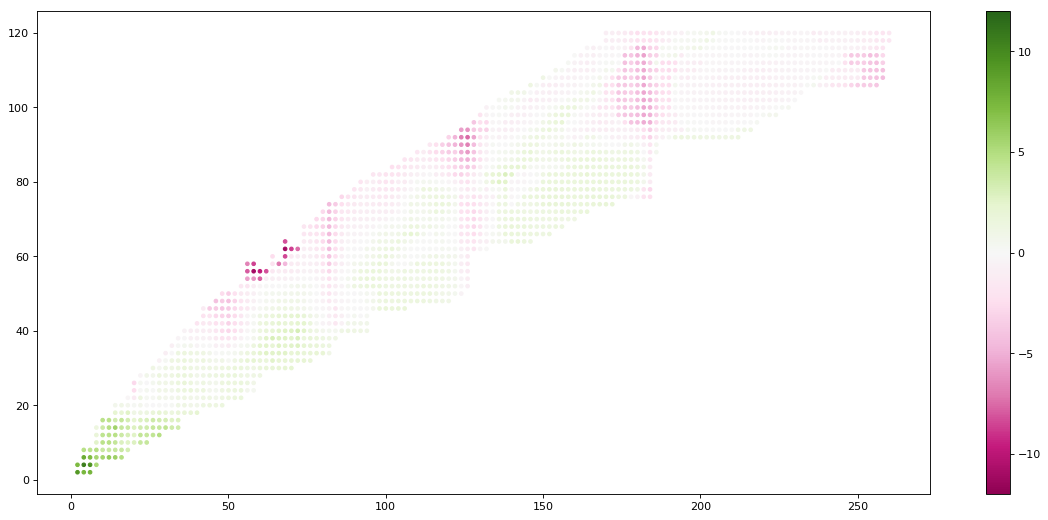

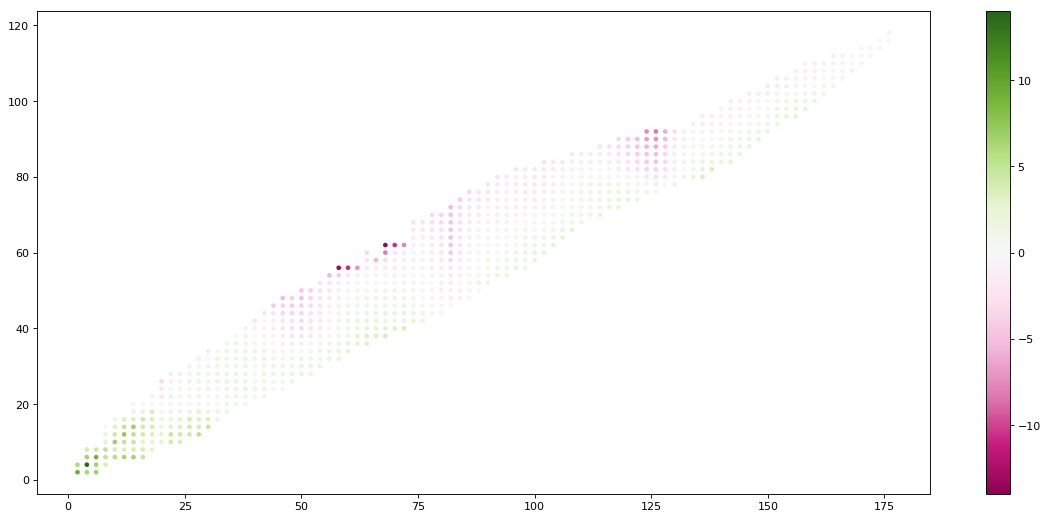

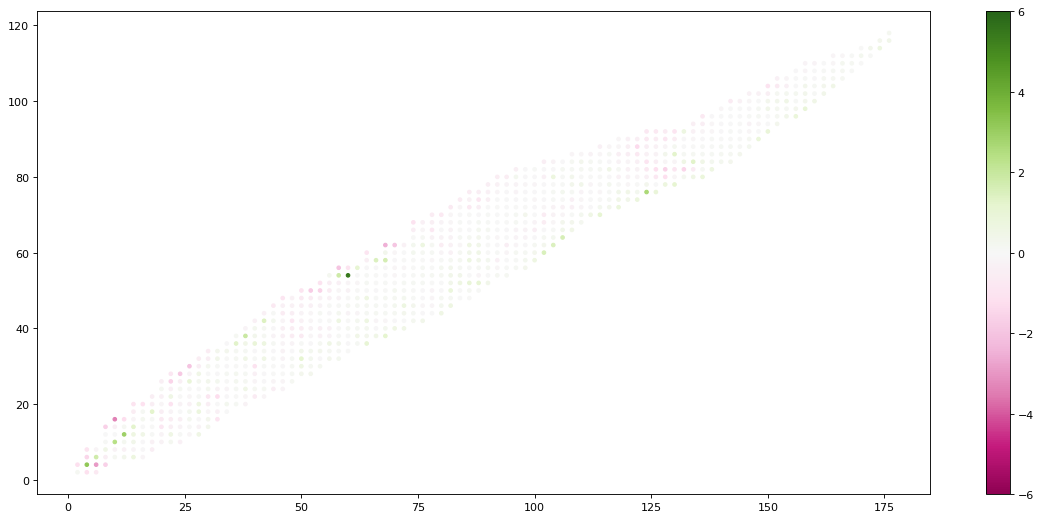

In [9]:
ext = np.int(np.ceil(max(-np.min(all_fea_pred),np.max(all_fea_pred))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(df['N'],df['Z'],c=all_fea_pred,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()

ext = np.int(np.ceil(max(-np.min(match_df['Diff']),np.max(match_df['Diff']))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(match_df['N'],match_df['Z'],c=match_df['Diff'],cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()

ext = np.int(np.ceil(max(-np.min(match_df['Diff']-all_fea_pred_match),np.max(match_df['Diff']-all_fea_pred_match))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(match_df['N'],match_df['Z'],c=match_df['Diff']-all_fea_pred_match,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()

            

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  import sys


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  import sys


delta_n    Z


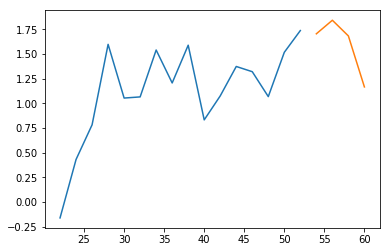

train score:     0.9400274565102857
test score:     0.5108125424659664
[0.47401442 0.52598558]



delta_n    bz


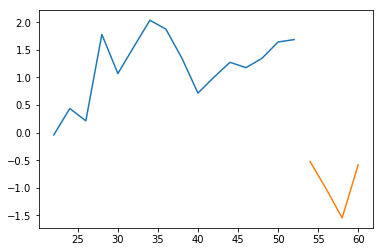

train score:     0.9314680117026723
test score:     0.5033741962687008
[0.49811793 0.50188207]








C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  import sys


delta_p    delta_n


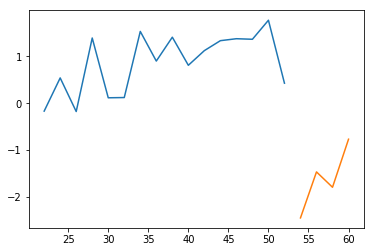

train score:     0.9293536157373098
test score:     0.5156000720031881
[0.54949232 0.45050768]








C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  import sys


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  import sys


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  import sys


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  import sys


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  import sys


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  import sys


beta2_n    Z


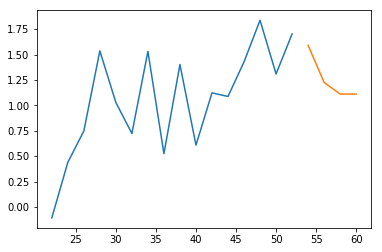

train score:     0.9195543067391786
test score:     0.617648350663646
[0.4484078 0.5515922]



beta2_n    bz


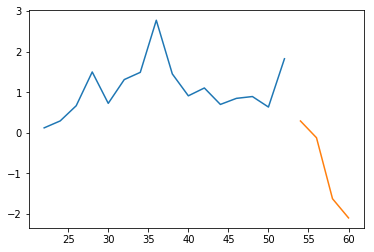

train score:     0.8888591015012262
test score:     0.5161986274273762
[0.44195909 0.55804091]



beta2_n    delta_n


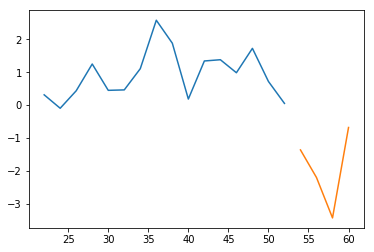

train score:     0.9333603389510057
test score:     0.5008566255116584
[0.43010204 0.56989796]



beta2_n    LNlambda_p


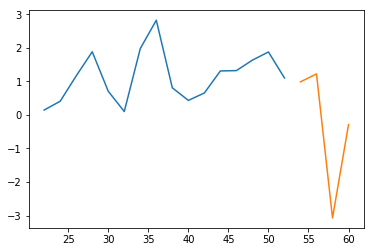

train score:     0.9291879904954752
test score:     0.5110523383820794
[0.44987878 0.55012122]








C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  import sys


beta2_p    Z


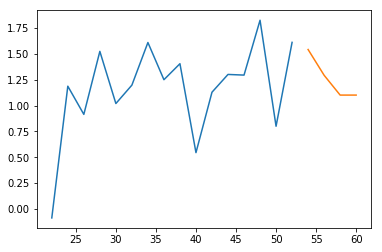

train score:     0.9236149797028932
test score:     0.6381064968051564
[0.45101153 0.54898847]



beta2_p    bz


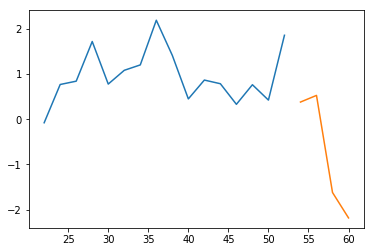

train score:     0.8927821909981356
test score:     0.5014546628936211
[0.4478815 0.5521185]



beta2_p    delta_n


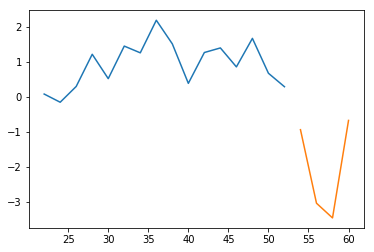

train score:     0.93605473177783
test score:     0.526831850516861
[0.43175626 0.56824374]








C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  import sys


beta2_t    Z


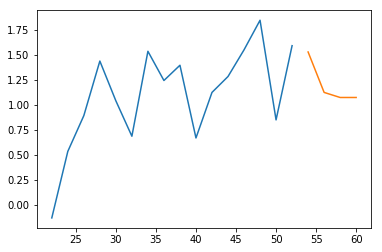

train score:     0.9214214098387141
test score:     0.6165904179751713
[0.45280611 0.54719389]



beta2_t    bz


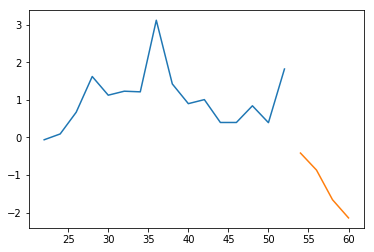

train score:     0.8912823050419879
test score:     0.5164210594927806
[0.44327841 0.55672159]



beta2_t    delta_n


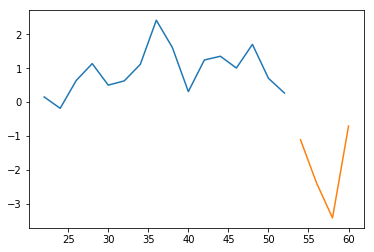

train score:     0.9321238996712065
test score:     0.5157346376728528
[0.4239501 0.5760499]



beta2_t    delta_p


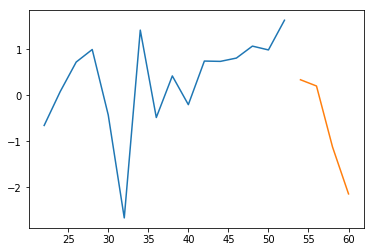

train score:     0.9296475607887998
test score:     0.5074589226703896
[0.40567865 0.59432135]



beta2_t    LNlambda_p


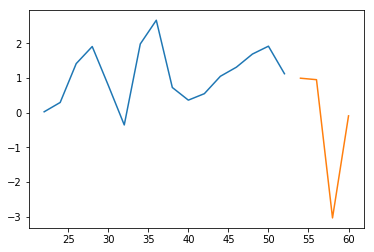

train score:     0.9316680198125578
test score:     0.5290280060784704
[0.45408984 0.54591016]








C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  import sys


quadpole_n    Z


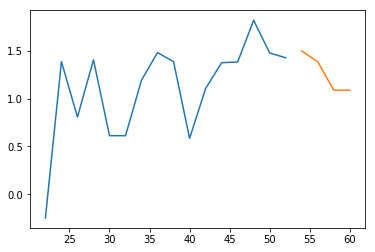

train score:     0.9291068400945028
test score:     0.6633111069813555
[0.44373674 0.55626326]



quadpole_n    delta_n


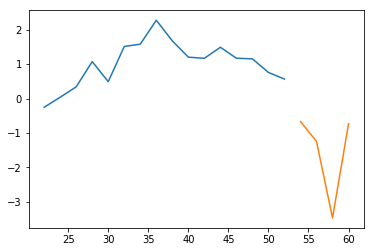

train score:     0.9347310780554039
test score:     0.5238632046703631
[0.41942816 0.58057184]








C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  import sys


quadpole_p    Z


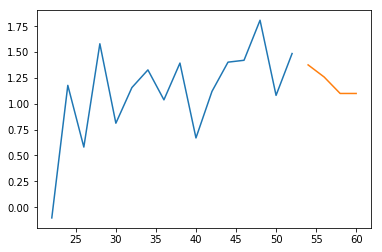

train score:     0.9252822735767752
test score:     0.628725772628297
[0.44468224 0.55531776]



quadpole_p    bz


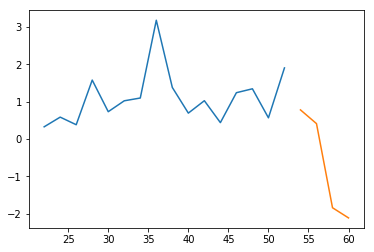

train score:     0.8951275809517147
test score:     0.5478627951661542
[0.44086036 0.55913964]



quadpole_p    delta_n


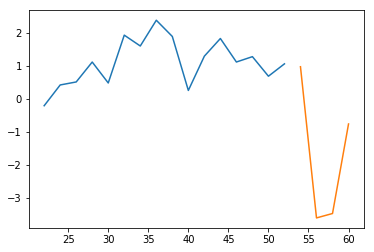

train score:     0.9327577688279022
test score:     0.5350253709048077
[0.41752089 0.58247911]



quadpole_p    delta_p


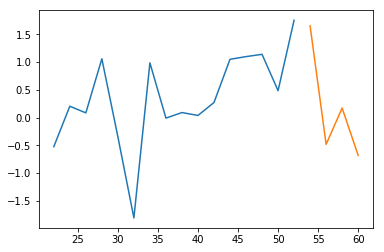

train score:     0.9317682400535653
test score:     0.5057352651928502
[0.40834898 0.59165102]



quadpole_p    LNdelta_n


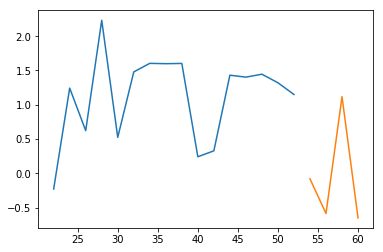

train score:     0.928474857926012
test score:     0.509652496218738
[0.42660081 0.57339919]








C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  import sys


hexdpole_n    Z


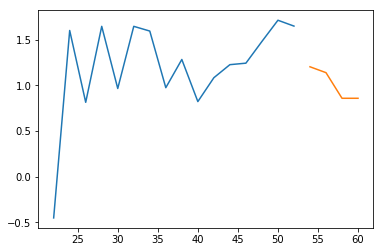

train score:     0.9135883534465868
test score:     0.6039478494151244
[0.43045823 0.56954177]








C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  import sys


hexdpole_p    Z


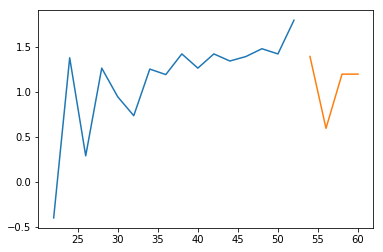

train score:     0.9151204126369523
test score:     0.608657987347865
[0.43157292 0.56842708]



hexdpole_p    LNdelta_n


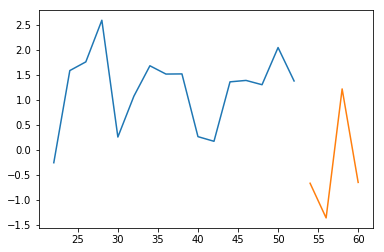

train score:     0.9246339933312249
test score:     0.5165046723055448
[0.41410917 0.58589083]








C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  import sys


q6_n    Z


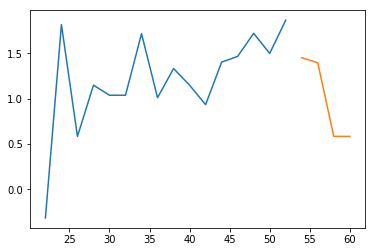

train score:     0.9072313537623299
test score:     0.5601424436061699
[0.42478827 0.57521173]








C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  import sys


q6_p    Z


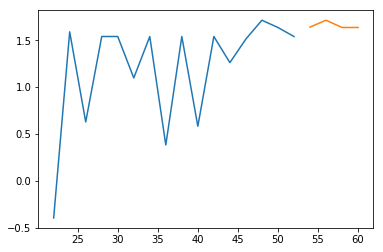

train score:     0.9041040425763222
test score:     0.624127791287667
[0.42996737 0.57003263]








C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  import sys


q8_n    Z


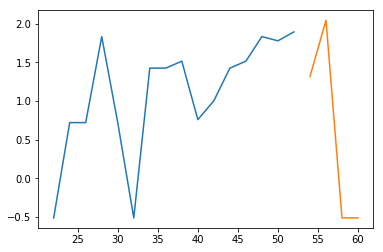

train score:     0.8939268972795387
test score:     0.5930781224274975
[0.42286363 0.57713637]








C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  import sys


q8_p    Z


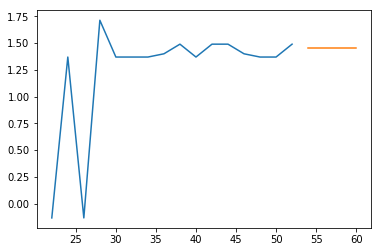

train score:     0.8848760977146994
test score:     0.5204969050512143
[0.41997703 0.58002297]








C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  import sys


KineticE_p    Z


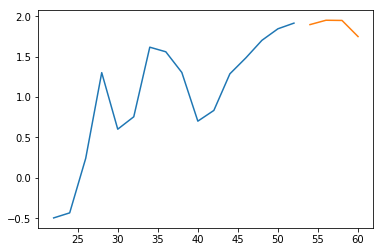

train score:     0.9650025176892764
test score:     0.6544700473477771
[0.64382111 0.35617889]



KineticE_p    bz


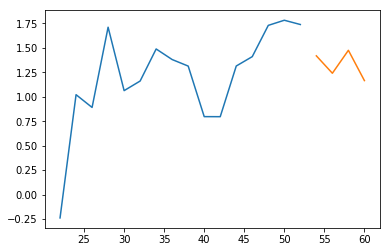

train score:     0.9414753361317487
test score:     0.5266206253556318
[0.66823541 0.33176459]



KineticE_p    delta_p


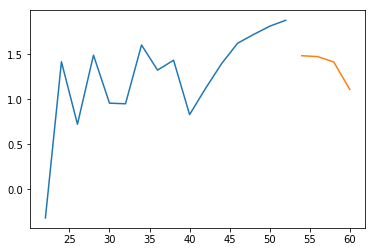

train score:     0.957189525980135
test score:     0.5174862517202534
[0.58152364 0.41847636]



KineticE_p    LNdelta_n


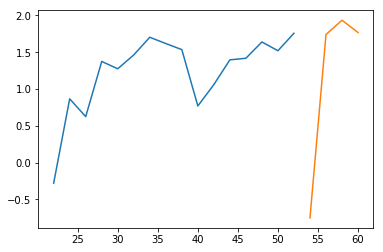

train score:     0.9337641342099986
test score:     0.5671384729645781
[0.59784159 0.40215841]



KineticE_p    beta2_n


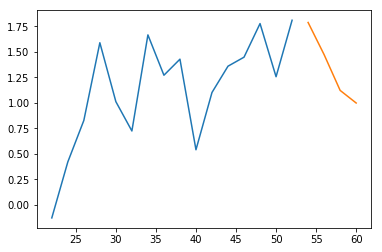

train score:     0.9496356624983563
test score:     0.6419646494342807
[0.60426159 0.39573841]



KineticE_p    beta2_p


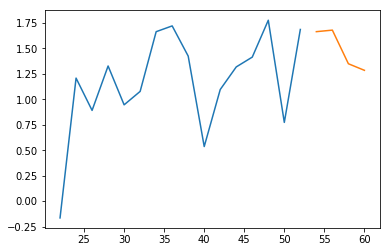

train score:     0.951935520154431
test score:     0.6475397102660517
[0.60327246 0.39672754]



KineticE_p    beta2_t


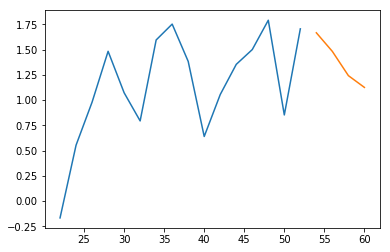

train score:     0.9501382508063526
test score:     0.6431344776527799
[0.60542209 0.39457791]



KineticE_p    quadpole_n


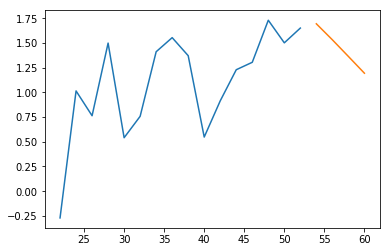

train score:     0.9581451406608286
test score:     0.6756791235103846
[0.60394312 0.39605688]



KineticE_p    quadpole_p


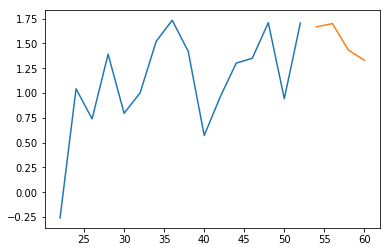

train score:     0.9540657670996903
test score:     0.6752071702728751
[0.6136694 0.3863306]



KineticE_p    hexdpole_n


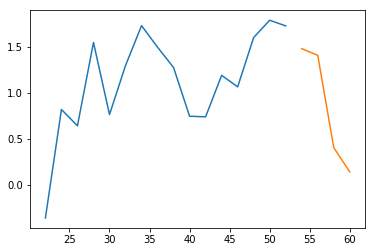

train score:     0.9567871575909918
test score:     0.645668385162297
[0.61850477 0.38149523]



KineticE_p    hexdpole_p


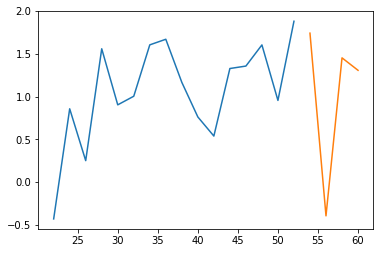

train score:     0.9572882586865453
test score:     0.6788217412505337
[0.62577192 0.37422808]



KineticE_p    q6_n


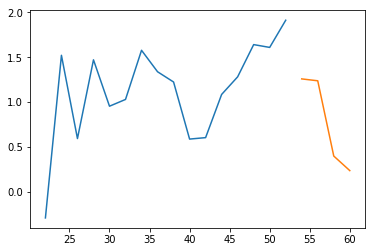

train score:     0.9549072018086444
test score:     0.6086875213415475
[0.63281438 0.36718562]



KineticE_p    q6_p


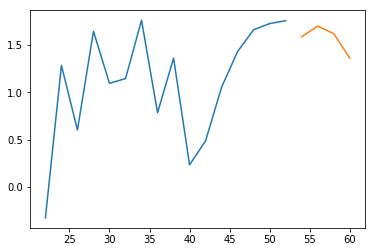

train score:     0.9536978320696415
test score:     0.6589369137949629
[0.62754715 0.37245285]



KineticE_p    q8_n


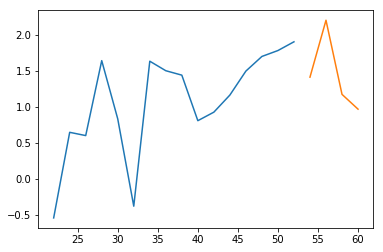

train score:     0.9518976564615499
test score:     0.6170743611354721
[0.63416788 0.36583212]



KineticE_p    q8_p


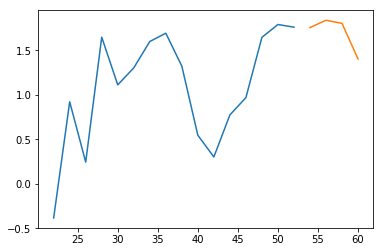

train score:     0.9515363963611269
test score:     0.5951615680197102
[0.65456553 0.34543447]








C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  import sys


VolumeE    Z


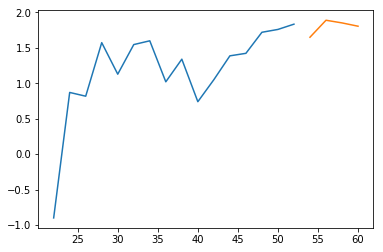

train score:     0.9743271906674578
test score:     0.8223078510294652
[0.38459922 0.61540078]



VolumeE    delta_n


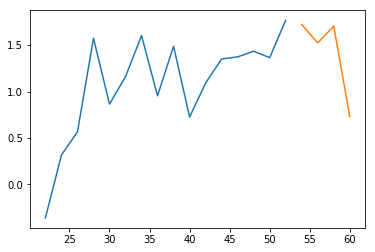

train score:     0.9405214209350032
test score:     0.5675708421007393
[0.58077396 0.41922604]



VolumeE    LNEnergy_n


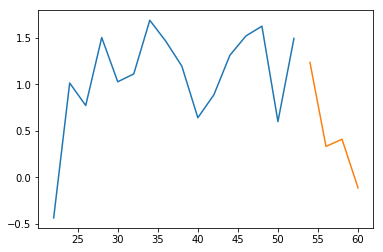

train score:     0.9410992126171379
test score:     0.5630959242835614
[0.61659099 0.38340901]



VolumeE    LNdelta_n


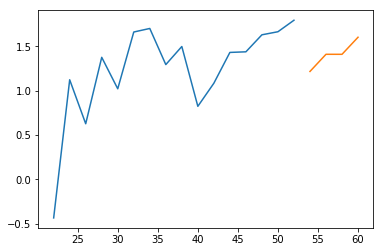

train score:     0.9388429768669397
test score:     0.5329567838373686
[0.60221244 0.39778756]



VolumeE    beta2_n


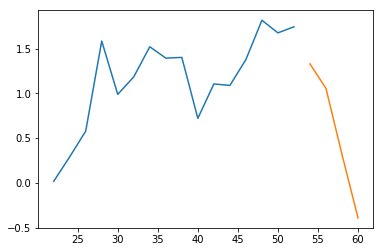

train score:     0.9474224031084649
test score:     0.5833363078909444
[0.61569987 0.38430013]



VolumeE    beta2_p


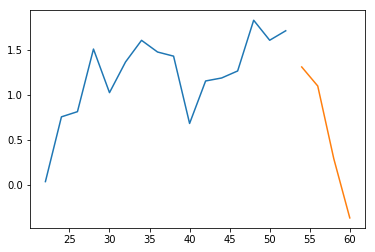

train score:     0.9498567757706665
test score:     0.5725934966649802
[0.60618371 0.39381629]



VolumeE    beta2_t


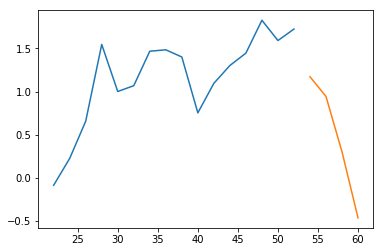

train score:     0.9475397732234001
test score:     0.577158884786334
[0.61218652 0.38781348]



VolumeE    quadpole_n


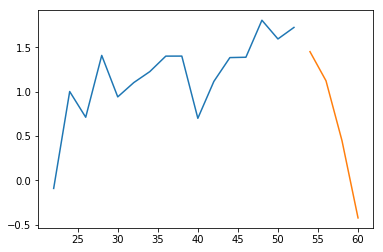

train score:     0.9484578687141979
test score:     0.5175394983643513
[0.60552786 0.39447214]



VolumeE    quadpole_p


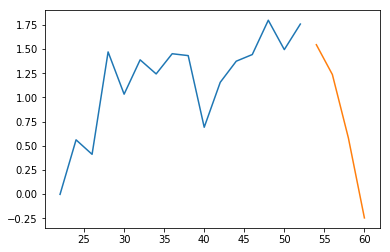

train score:     0.952712323039744
test score:     0.5471520802866807
[0.61223633 0.38776367]



VolumeE    q8_p


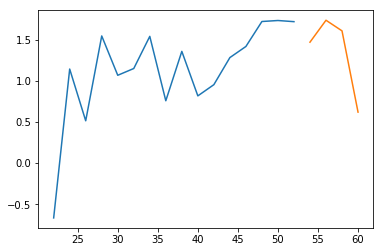

train score:     0.9405952643093767
test score:     0.508496088323805
[0.65700461 0.34299539]



VolumeE    KineticE_p


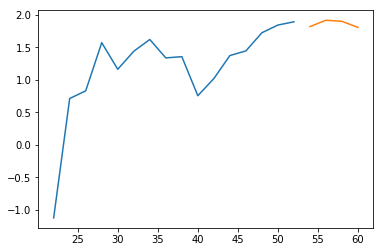

train score:     0.975624493954996
test score:     0.8293868376048892
[0.35908396 0.64091604]








C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  import sys


rho_rho    Z


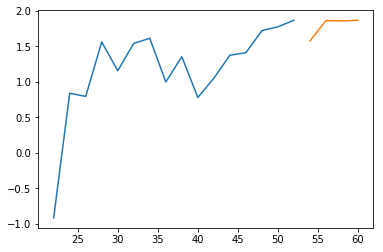

train score:     0.9737507799038069
test score:     0.8207021166197648
[0.39107128 0.60892872]



rho_rho    delta_n


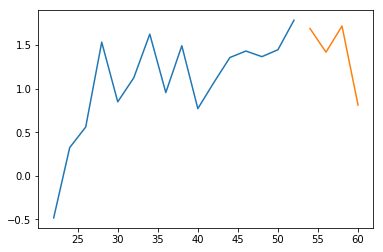

train score:     0.9395550135844555
test score:     0.5750379016106174
[0.58353712 0.41646288]



rho_rho    LNEnergy_n


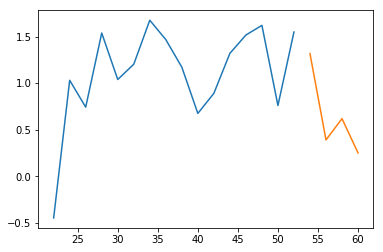

train score:     0.9396891139807532
test score:     0.5640116589067226
[0.61244714 0.38755286]



rho_rho    LNdelta_n


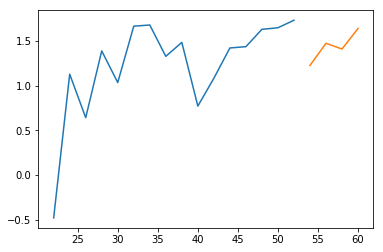

train score:     0.940694235567573
test score:     0.5452127089592176
[0.59866438 0.40133562]



rho_rho    beta2_n


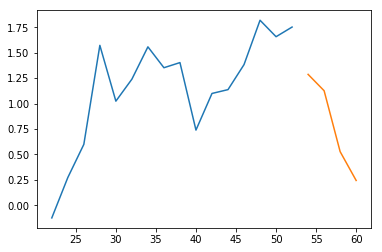

train score:     0.9460413427890547
test score:     0.5969360955386115
[0.61631917 0.38368083]



rho_rho    beta2_p


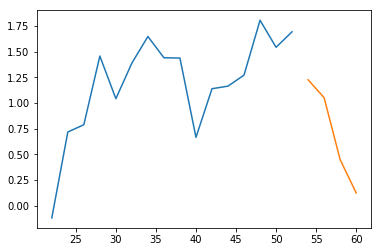

train score:     0.9469233999751719
test score:     0.583967494423276
[0.60934264 0.39065736]



rho_rho    beta2_t


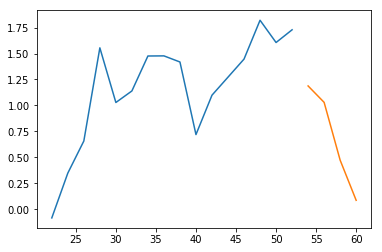

train score:     0.9467381230405832
test score:     0.5899258790288442
[0.61108886 0.38891114]



rho_rho    quadpole_n


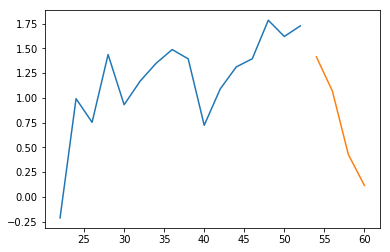

train score:     0.9486269207509828
test score:     0.5334236283513452
[0.60505957 0.39494043]



rho_rho    quadpole_p


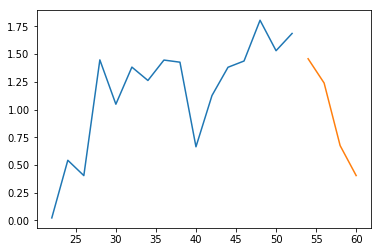

train score:     0.9521502366461534
test score:     0.5625400817886448
[0.61077905 0.38922095]



rho_rho    q8_p


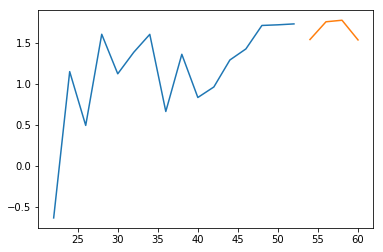

train score:     0.9395169637739444
test score:     0.5106242307152418
[0.65305765 0.34694235]



rho_rho    KineticE_p


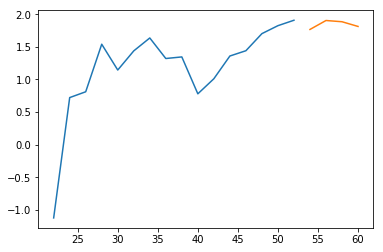

train score:     0.9757466384728759
test score:     0.8272475734286198
[0.35787653 0.64212347]








C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  import sys


CoulombE    Z


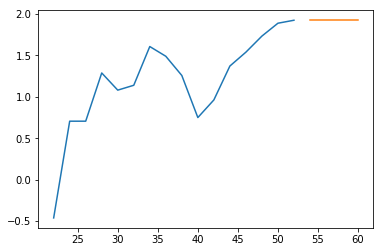

train score:     0.9727048032849105
test score:     0.7427526729579667
[0.70034069 0.29965931]



CoulombE    bz


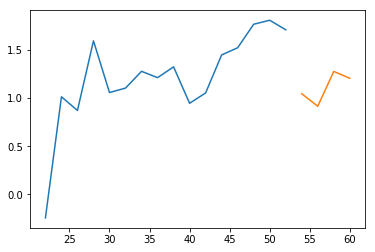

train score:     0.9654893495194674
test score:     0.6768985408113657
[0.69746795 0.30253205]



CoulombE    delta_n


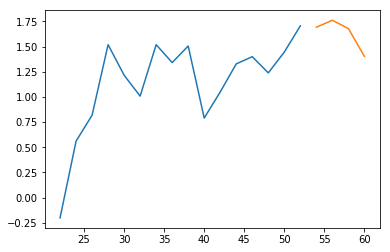

train score:     0.9471772235927184
test score:     0.511805059956191
[0.6245753 0.3754247]



CoulombE    delta_p


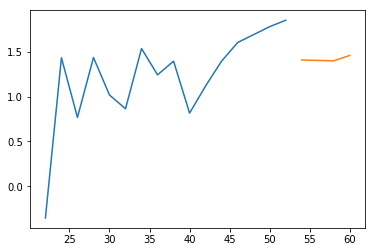

train score:     0.9606552552402743
test score:     0.6171554675695585
[0.59274196 0.40725804]



CoulombE    pairingE_p


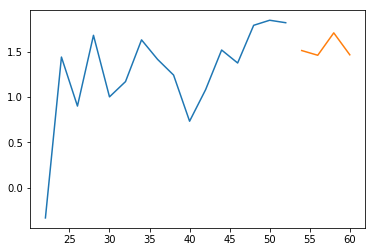

train score:     0.9480158345348961
test score:     0.6090196646030024
[0.70392922 0.29607078]



CoulombE    LNlambda_n


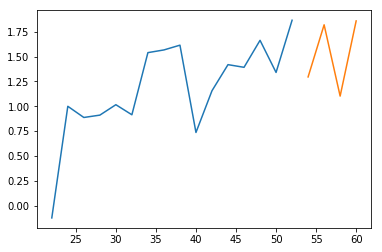

train score:     0.9433189471214463
test score:     0.6072614935140643
[0.6514699 0.3485301]



CoulombE    LNlambda_p


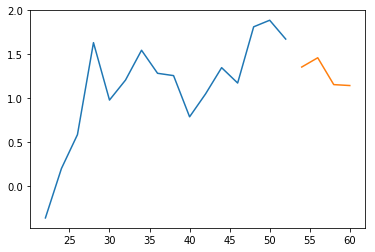

train score:     0.9516825352483012
test score:     0.6402346686323332
[0.71790097 0.28209903]



CoulombE    LNEnergy_n


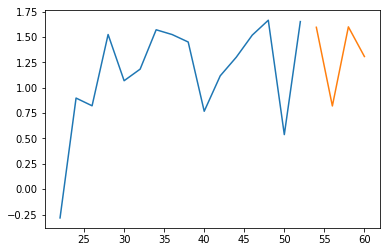

train score:     0.9362739592098461
test score:     0.575903279077987
[0.62728471 0.37271529]



CoulombE    LNdelta_n


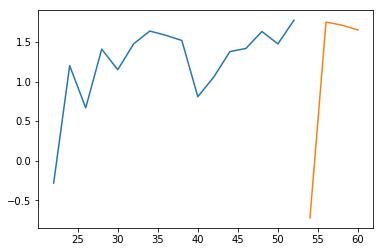

train score:     0.9436722871523738
test score:     0.5857641199104995
[0.6224631 0.3775369]



CoulombE    beta2_n


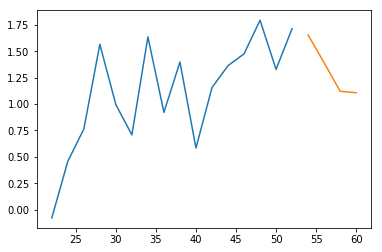

train score:     0.9576440344244358
test score:     0.7085739303895668
[0.61889939 0.38110061]



CoulombE    beta2_p


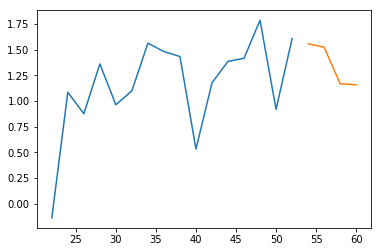

train score:     0.9595303505326117
test score:     0.7172921351435404
[0.61277149 0.38722851]



CoulombE    beta2_t


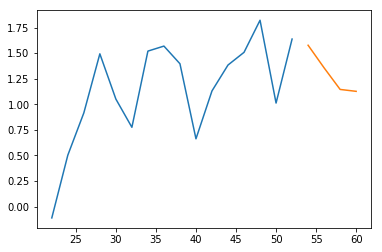

train score:     0.9588067498718009
test score:     0.7115338927517905
[0.61313767 0.38686233]



CoulombE    quadpole_n


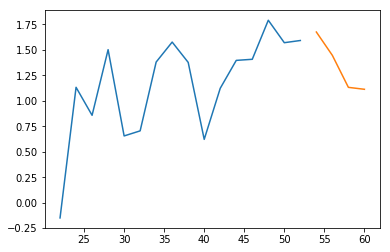

train score:     0.9634289244681098
test score:     0.7371085951078686
[0.61629681 0.38370319]



CoulombE    quadpole_p


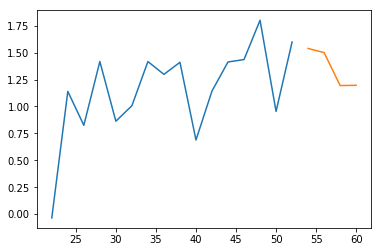

train score:     0.9624889792329261
test score:     0.726700364324165
[0.6234339 0.3765661]



CoulombE    hexdpole_n


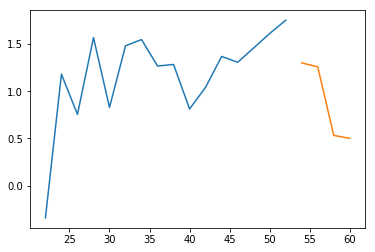

train score:     0.9622569185124211
test score:     0.6993072328907204
[0.63101017 0.36898983]



CoulombE    hexdpole_p


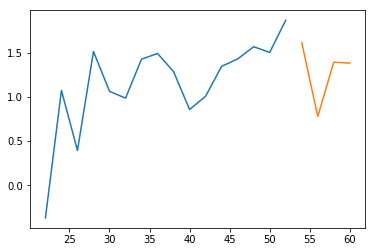

train score:     0.9626073338646136
test score:     0.7257266448350641
[0.6298526 0.3701474]



CoulombE    q6_n


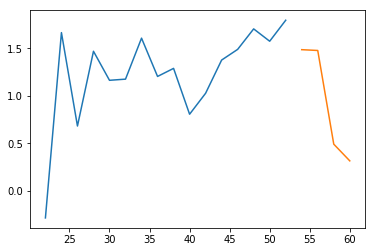

train score:     0.9592317009100921
test score:     0.6575715052783041
[0.63998831 0.36001169]



CoulombE    q6_p


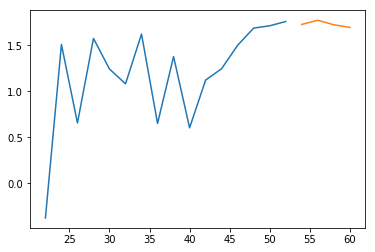

train score:     0.9589591347743983
test score:     0.679065886996344
[0.63536222 0.36463778]



CoulombE    q8_n


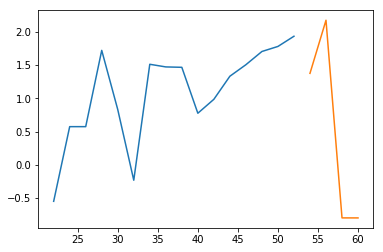

train score:     0.9594839810575629
test score:     0.6808757532288088
[0.64301945 0.35698055]



CoulombE    q8_p


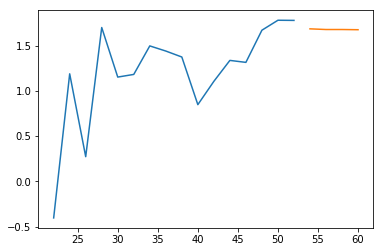

train score:     0.9584029039920083
test score:     0.6462702818184916
[0.66027764 0.33972236]



CoulombE    KineticE_p


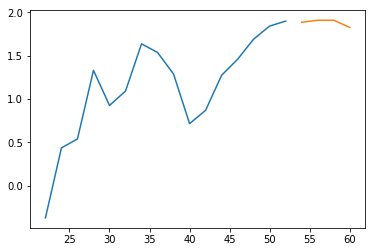

train score:     0.9690109255384804
test score:     0.7481965799655608
[0.48424232 0.51575768]



CoulombE    VolumeE


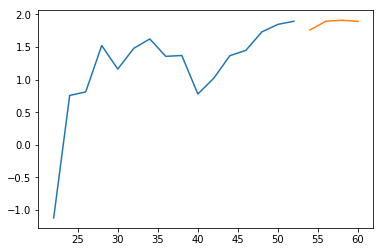

train score:     0.9607485166565566
test score:     0.6600512404043473
[0.68144078 0.31855922]



CoulombE    rho_rho


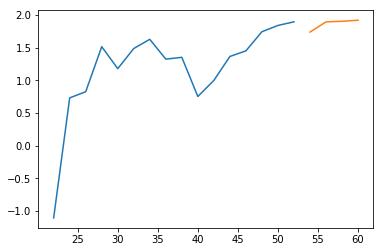

train score:     0.96215119179944
test score:     0.6675694838881663
[0.68296383 0.31703617]








C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  import sys


CoulombDir    Z


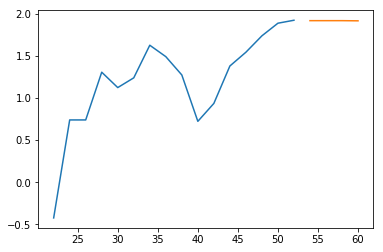

train score:     0.9709989471635444
test score:     0.7411946851473925
[0.69489354 0.30510646]



CoulombDir    bz


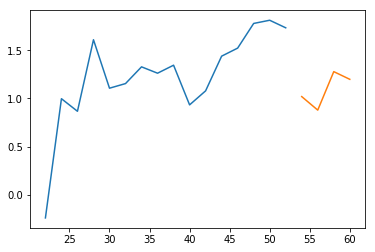

train score:     0.963017893730658
test score:     0.6673744287290166
[0.70157483 0.29842517]



CoulombDir    delta_n


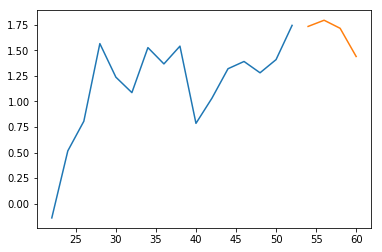

train score:     0.9465856766922505
test score:     0.5023698492923261
[0.623082 0.376918]



CoulombDir    delta_p


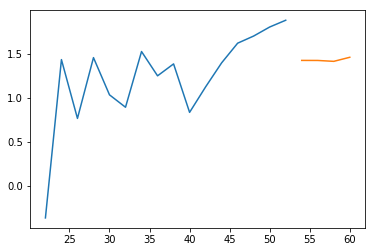

train score:     0.9578316681816683
test score:     0.6055181494353421
[0.59371954 0.40628046]



CoulombDir    pairingE_p


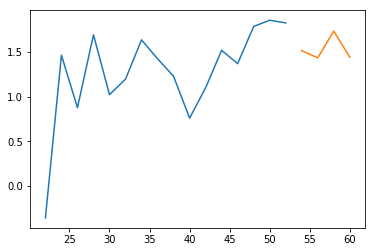

train score:     0.9411579698795389
test score:     0.553238250418589
[0.69436603 0.30563397]



CoulombDir    LNlambda_n


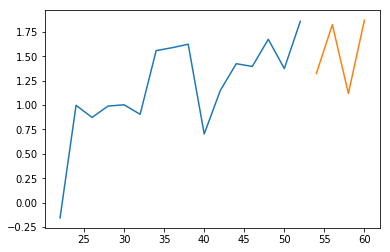

train score:     0.940711043978509
test score:     0.6084976636831052
[0.64942443 0.35057557]



CoulombDir    LNlambda_p


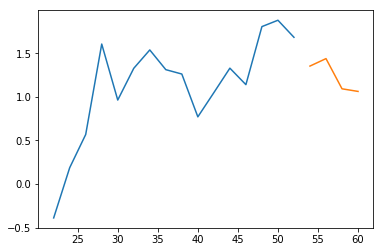

train score:     0.9483648529783117
test score:     0.6332078599048134
[0.70918577 0.29081423]



CoulombDir    LNEnergy_n


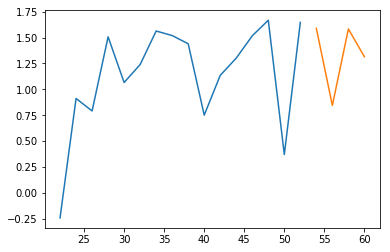

train score:     0.9359021602470572
test score:     0.5548045661660105
[0.6229795 0.3770205]



CoulombDir    LNdelta_n


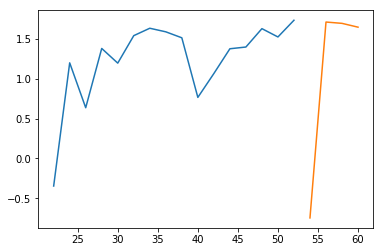

train score:     0.9427646373258964
test score:     0.5891494097263599
[0.61790723 0.38209277]



CoulombDir    beta2_n


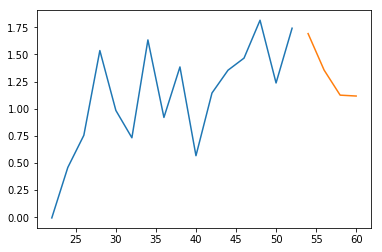

train score:     0.9566886486730077
test score:     0.703466460596526
[0.61594105 0.38405895]



CoulombDir    beta2_p


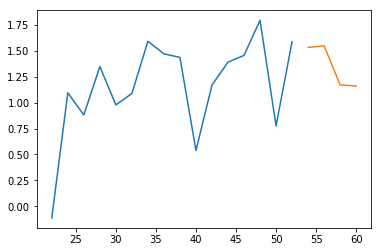

train score:     0.959636258363655
test score:     0.7143263028442303
[0.6116049 0.3883951]



CoulombDir    beta2_t


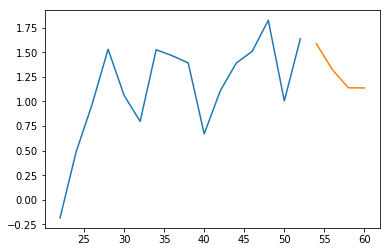

train score:     0.9578197282892276
test score:     0.7109451250717145
[0.61313562 0.38686438]



CoulombDir    quadpole_n


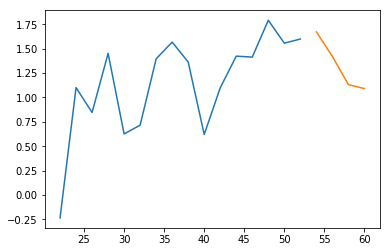

train score:     0.9631325842251661
test score:     0.7370845532114705
[0.6132569 0.3867431]



CoulombDir    quadpole_p


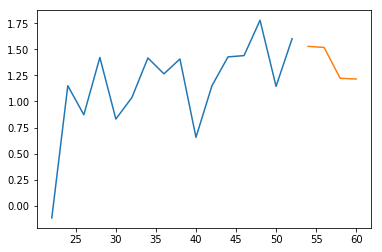

train score:     0.9617248433467663
test score:     0.725379196654502
[0.62028763 0.37971237]



CoulombDir    hexdpole_n


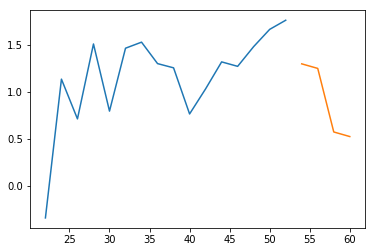

train score:     0.9617845426866186
test score:     0.6919339140542529
[0.6298937 0.3701063]



CoulombDir    hexdpole_p


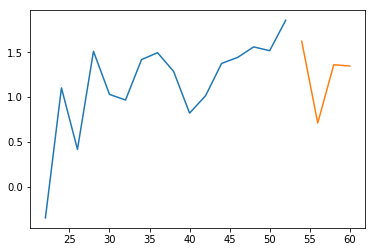

train score:     0.9634525140418215
test score:     0.7241704430648748
[0.63078889 0.36921111]



CoulombDir    q6_n


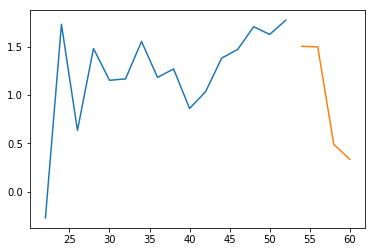

train score:     0.9595287908614328
test score:     0.646657447325947
[0.63775217 0.36224783]



CoulombDir    q6_p


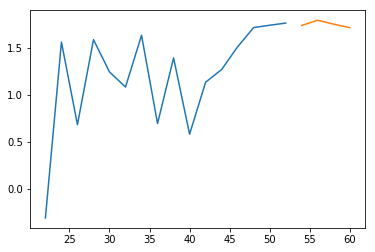

train score:     0.9583142568561541
test score:     0.6756687393089076
[0.63633319 0.36366681]



CoulombDir    q8_n


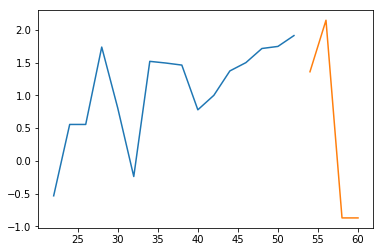

train score:     0.9597224915215449
test score:     0.6830279879222095
[0.64191158 0.35808842]



CoulombDir    q8_p


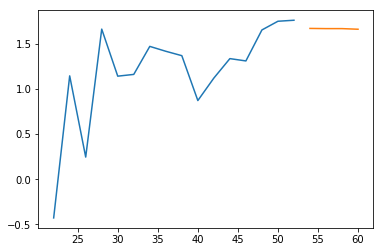

train score:     0.9582934916464639
test score:     0.6420194807238095
[0.65877653 0.34122347]



CoulombDir    KineticE_p


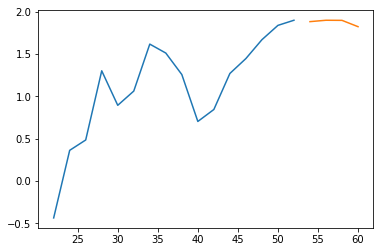

train score:     0.9681820423792904
test score:     0.7460431732655644
[0.48016576 0.51983424]



CoulombDir    VolumeE


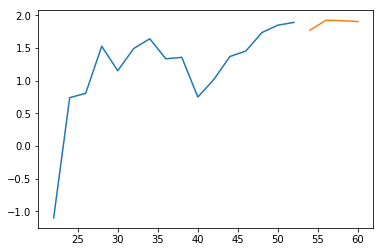

train score:     0.9584399153066137
test score:     0.7130995503399582
[0.66681798 0.33318202]



CoulombDir    rho_rho


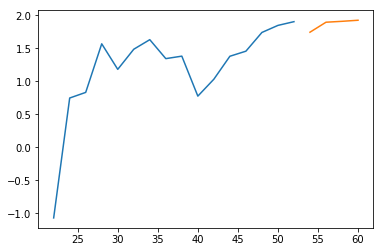

train score:     0.9568169543736692
test score:     0.7188452413625356
[0.66410232 0.33589768]








C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  import sys


CoulombEx    Z


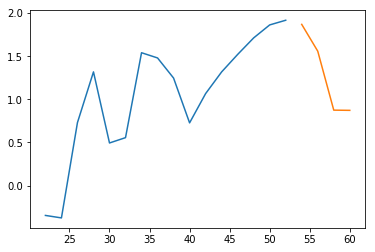

train score:     0.9450104695986761
test score:     0.7124107166476549
[0.72653666 0.27346334]



CoulombEx    bz


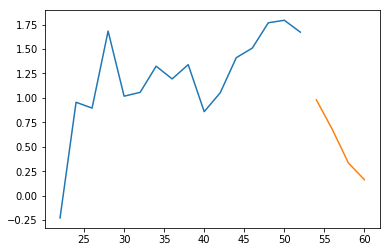

train score:     0.9526912021309557
test score:     0.5487851073548204
[0.67883509 0.32116491]



CoulombEx    delta_p


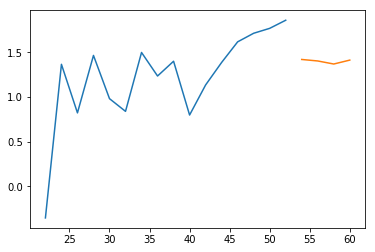

train score:     0.9580869639235792
test score:     0.5557910736881537
[0.58656101 0.41343899]



CoulombEx    pairingE_p


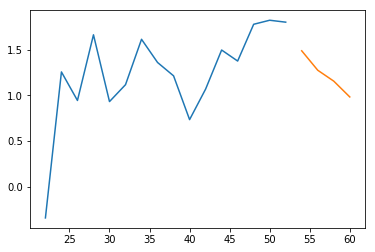

train score:     0.9308926743208442
test score:     0.5586596086520286
[0.66617368 0.33382632]



CoulombEx    LNlambda_p


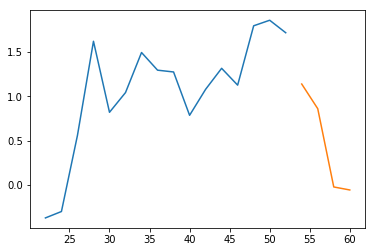

train score:     0.9370683566013597
test score:     0.5512455525348977
[0.68088209 0.31911791]



CoulombEx    LNEnergy_n


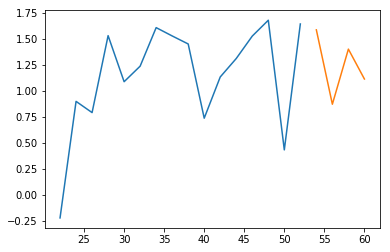

train score:     0.9349063212684301
test score:     0.5365633448022487
[0.60102311 0.39897689]



CoulombEx    LNdelta_n


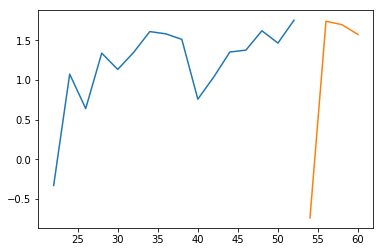

train score:     0.9375457742637466
test score:     0.569621271555664
[0.60321184 0.39678816]



CoulombEx    beta2_n


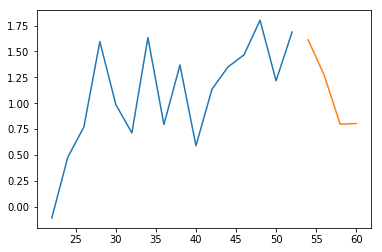

train score:     0.9532682294913919
test score:     0.6804826710089604
[0.61187948 0.38812052]



CoulombEx    beta2_p


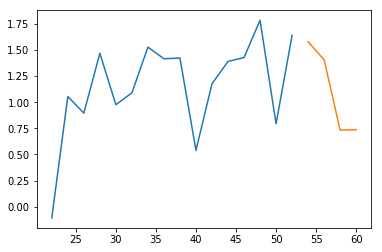

train score:     0.9561598189163756
test score:     0.7049239534357696
[0.61142064 0.38857936]



CoulombEx    beta2_t


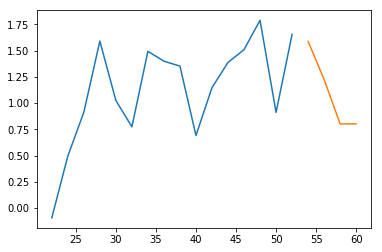

train score:     0.9554591266224544
test score:     0.6888524239903382
[0.608316 0.391684]



CoulombEx    quadpole_n


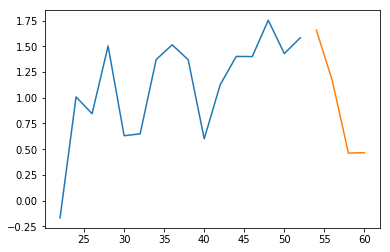

train score:     0.961207151061078
test score:     0.7254925238595005
[0.61029276 0.38970724]



CoulombEx    quadpole_p


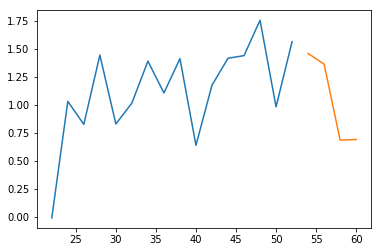

train score:     0.9581361338405245
test score:     0.7132334528043022
[0.61842126 0.38157874]



CoulombEx    hexdpole_n


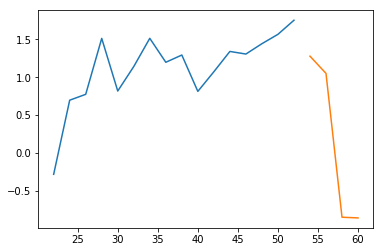

train score:     0.9600856491703518
test score:     0.6863515976658501
[0.62290575 0.37709425]



CoulombEx    hexdpole_p


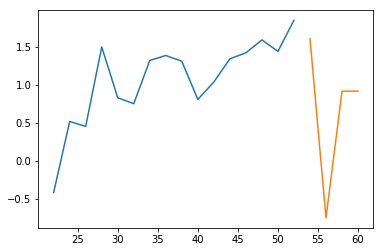

train score:     0.9612280360176682
test score:     0.7223306980290649
[0.62654293 0.37345707]



CoulombEx    q6_n


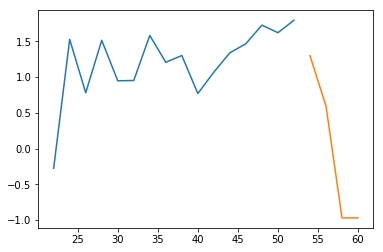

train score:     0.9569922691302885
test score:     0.6382060367164031
[0.63522299 0.36477701]



CoulombEx    q6_p


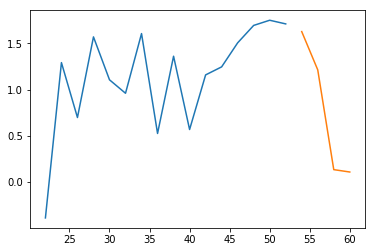

train score:     0.9574161873830053
test score:     0.6782734840069142
[0.63500734 0.36499266]



CoulombEx    q8_n


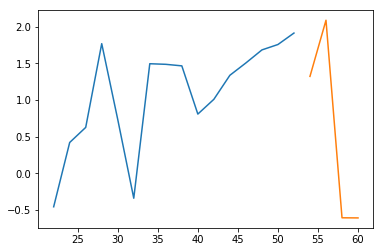

train score:     0.9559902355930014
test score:     0.6816954884695561
[0.64189671 0.35810329]



CoulombEx    q8_p


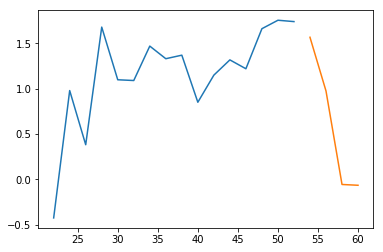

train score:     0.9531776174859138
test score:     0.6225851178895307
[0.65468207 0.34531793]



CoulombEx    KineticE_p


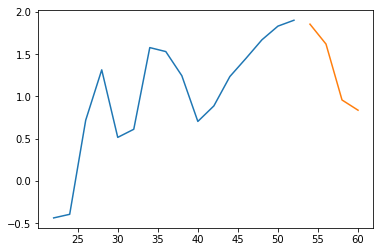

train score:     0.9551758985811876
test score:     0.6532538594751438
[0.48604299 0.51395701]



CoulombEx    VolumeE


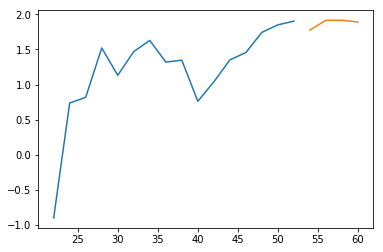

train score:     0.9757286570899882
test score:     0.8429878206722419
[0.66005171 0.33994829]



CoulombEx    rho_rho


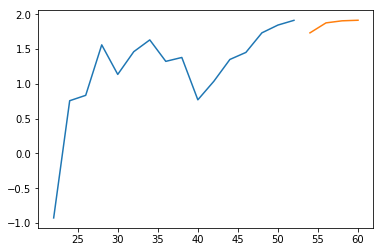

train score:     0.9759782695274803
test score:     0.8437640073873296
[0.65825065 0.34174935]



CoulombEx    CoulombE


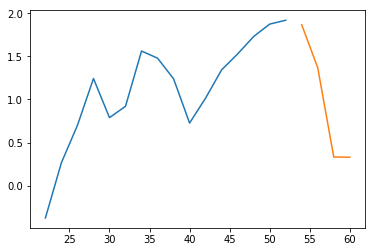

train score:     0.9639361369589375
test score:     0.6709675842734035
[0.49968127 0.50031873]



CoulombEx    CoulombDir


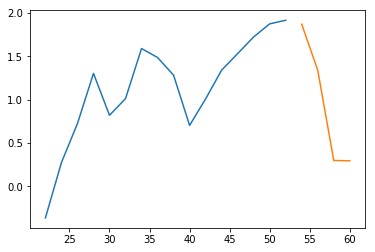

train score:     0.962535394309735
test score:     0.6671986112007747
[0.49494116 0.50505884]








In [35]:
all_pred=[] 
all_match_pred=[]
a=np.linspace(0,25,26)

for i in a:
    if i!=0:
        b=np.linspace(0,i-1,i)
        #print(b)
        for j in b:
            
            d=match_df[feal_enovl[int(i)]]
            e=match_df[feal_enovl[int(j)]]
            
            f=df[feal_enovl[int(i)]]
            g=df[feal_enovl[int(j)]]
            
            
            data     = [d,e]
            headers  = [feal_enovl[int(i)], feal_enovl[int(j)]]
            tr_te_fe = pd.concat(data, axis=1, keys=headers)
            tr_te_ta = match_df.Diff
            
            data     = [f,g]
            headers  = [feal_enovl[int(i)], feal_enovl[int(j)]]
            all_fe   = pd.concat(data, axis=1, keys=headers)
            
            
            rf=RandomForestRegressor(n_estimators=1000)#, bootstrap=False,)

            

            X_train, X_test, y_train, y_test = train_test_split(tr_te_fe,tr_te_ta, test_size =0.25, random_state=42 )

            rf.fit(X_train,y_train)

                  
                 
            te_sco=rf.score(X_test,y_test)
            if te_sco>=0.5:
                print( feal_enovl[int(i)],"  ", feal_enovl[int(j)])
                
                pred        =rf.predict(all_fe)
                pred_match  =rf.predict(tr_te_fe)
                pred_train  =rf.predict(X_test)
                pred_test   =rf.predict(X_train)
                
                all_pred.append(pred)
                all_match_pred.append(pred_match)
                
                
                
                isotope_match=[]
                isotope_N_match=[]
                
                for lm in range(0,840):
                    if match_df['Z'][lm]==28:
                        isotope_N_match.append(match_df['N'][lm])
                        isotope_match.append((match_df[feal_enovl[int(i)]][lm],match_df[feal_enovl[int(j)]][lm]))
                        
                pred_iso_match=rf.predict(isotope_match)
                
                
                



                isotope_no_match=[]
                isotope_N_no_match=[]
                
                for lm in range(0,1205):
                    if no_match_df['Z'][lm]==28:
                        isotope_N_no_match.append(no_match_df['N'][lm])
                        isotope_no_match.append((no_match_df[feal_enovl[int(i)]][lm],no_match_df[feal_enovl[int(j)]][lm]))
                        

                pred_iso_no_match=rf.predict(isotope_no_match)
                
                plt.plot(isotope_N_match, pred_iso_match)
                plt.plot(isotope_N_no_match, pred_iso_no_match)
                plt.show()
                
                

                
                print("train score:    ", rf.score(X_train,y_train))
                print("test score:    ", rf.score(X_test,y_test))
                print(rf.feature_importances_)
                
                #ext = np.int(np.ceil(max(-np.min(pred),np.max(pred))))
                #fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
                #sc = plt.scatter(df['N'],df['Z'],c=pred,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
                #plt.colorbar(sc)
                #plt.show()

                #ext = np.int(np.ceil(max(-np.min(match_df['Diff']),np.max(match_df['Diff']))))
                #fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
                #sc = plt.scatter(match_df['N'],match_df['Z'],c=match_df['Diff'],cmap='PiYG',vmin=-ext,vmax=ext,s=10)
                #plt.colorbar(sc)
                #plt.show()

                #ext = np.int(np.ceil(max(-np.min(match_df['Diff']-pred_match),np.max(match_df['Diff']-pred_match))))
                #fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
                #sc = plt.scatter(match_df['N'],match_df['Z'],c=match_df['Diff']-pred_match,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
                #plt.colorbar(sc)
                #plt.show()

                
                print('\n\n')
                
            
            

            
            
            
        print("\n\n")

In [36]:
print(np.shape(all_pred))
print(np.shape(all_match_pred))


(135, 2045)
(135, 840)


In [31]:

for i in range(0,840):
    if match_df['Z'][i]==20:
        print(match_df['N'][i])

        

for i in range(0,1205):
    if no_match_df['Z'][i]==20:
        print(no_match_df['N'][i])
        
        
        
        
match_df.describe()
#840
#1205

14.0
16.0
18.0
20.0
22.0
24.0
26.0
28.0
30.0
32.0
34.0
36.0
38.0
40.0
42.0
44.0
46.0
48.0


,Z,N,Energy,NShells,b0,bz,bp,lambda_n,lambda_p,Lambda_n,...,CoulombE,CoulombDir,CoulombEx,TensorE,HartreeE,ExtraE,ExternalFE,Entropy_n,Entropy_p,Diff
count,840.000000,840.000000,840.000000,840.0,840.000000,840.00000,840.000000,840.000000,840.000000,840.000000,...,840.000000,840.000000,840.000000,840.000000,840.0,840.0,840.0,840.0,840.0,840.000000
mean,58.266667,82.895238,-1119.776189,20.0,2.046657,2.12884,2.009242,-7.542471,-7.251526,-7.542471,...,503.963076,526.349030,-22.385952,-7.659142,0.0,0.0,0.0,0.0,0.0,0.000948
std,27.476727,42.808312,513.666496,0.0,0.216527,0.26981,0.211353,3.332471,5.282697,3.332471,...,351.559007,362.023756,10.642448,3.322694,0.0,0.0,0.0,0.0,0.0,2.445782
min,2.000000,2.000000,-2080.744100,20.0,1.156730,1.19380,1.138640,-21.176000,-27.610260,-21.176000,...,0.759800,1.326000,-45.374400,-20.357200,0.0,0.0,0.0,0.0,0.0,-13.560979
25%,36.000000,48.000000,-1529.895975,20.0,1.928880,1.97799,1.890130,-9.504017,-10.223638,-9.504017,...,204.055300,218.114425,-30.970700,-10.204150,0.0,0.0,0.0,0.0,0.0,-1.151338
50%,58.000000,82.000000,-1159.270350,20.0,2.092080,2.16539,2.032335,-7.121860,-6.107900,-7.121860,...,444.044350,466.269700,-22.485600,-7.879400,0.0,0.0,0.0,0.0,0.0,0.023194
75%,80.000000,114.000000,-729.952825,20.0,2.208970,2.33634,2.198660,-5.266198,-3.159080,-5.266198,...,768.808825,799.819950,-14.059125,-5.701550,0.0,0.0,0.0,0.0,0.0,1.345143
max,118.000000,176.000000,-18.907600,20.0,2.367450,2.47988,2.405080,0.258690,1.283770,0.258690,...,1462.059100,1507.433600,-0.566200,0.001800,0.0,0.0,0.0,0.0,0.0,13.881583
